  **Packages** **Imported** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

**Import** **Packages**

In [ ]:
df=pd.read_csv("/content/merged_gw.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25447 entries, 0 to 25446
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               25447 non-null  object 
 1   position           25447 non-null  object 
 2   team               25447 non-null  object 
 3   xP                 25447 non-null  float64
 4   assists            25447 non-null  int64  
 5   bonus              25447 non-null  int64  
 6   bps                25447 non-null  int64  
 7   clean_sheets       25447 non-null  int64  
 8   creativity         25447 non-null  float64
 9   element            25447 non-null  int64  
 10  fixture            25447 non-null  int64  
 11  goals_conceded     25447 non-null  int64  
 12  goals_scored       25447 non-null  int64  
 13  ict_index          25447 non-null  float64
 14  influence          25447 non-null  float64
 15  kickoff_time       25447 non-null  object 
 16  minutes            254

In [ ]:
teams=pd.read_csv("/content/teams.csv")

**Extract some data from teams to df**

In [ ]:
d = teams.set_index('id')['strength'].to_dict()
df['opp_strength'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_overall_home'].to_dict()
df['opp_strength_overall_home'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_overall_away'].to_dict()
df['opp_strength_overall_away'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_attack_home'].to_dict()
df['opp_strength_attack_home'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_attack_away'].to_dict()
df['opp_strength_attack_away'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_defence_home'].to_dict()
df['opp_strength_defence_home'] = df['opponent_team'].map(d)

d = teams.set_index('id')['strength_defence_away'].to_dict()
df['opp_strength_defence_away'] = df['opponent_team'].map(d)

#################
d = teams.set_index('name')['strength'].to_dict()
df['strength'] = df['team'].map(d)

d = teams.set_index('name')['strength_overall_home'].to_dict()
df['strength_overall_home'] = df['team'].map(d)

d = teams.set_index('name')['strength_overall_away'].to_dict()
df['strength_overall_away'] = df['team'].map(d)

d = teams.set_index('name')['strength_attack_home'].to_dict()
df['strength_attack_home'] = df['team'].map(d)

d = teams.set_index('name')['strength_attack_away'].to_dict()
df['strength_attack_away'] = df['team'].map(d)

d = teams.set_index('name')['strength_defence_home'].to_dict()
df['strength_defence_home'] = df['team'].map(d)

d = teams.set_index('name')['strength_defence_away'].to_dict()
df['strength_defence_away'] = df['team'].map(d)

# Data preprocessing 

In [ ]:
df2=df.sort_values(by=['name',"GW"])

In [ ]:
df2 = df2.drop_duplicates(keep='first',subset=["GW","name"])

In [ ]:
df2 = df2.reset_index(drop=True)

**Shift** **total** **point** 

In [ ]:
for i in range(1, len(df2)-1):
  if (df2.loc[i+1,"name"]==df2.loc[i,"name"]) and (df2.loc[i+1,"GW"]==df2.loc[i,"GW"]+1):
    df2.loc[i,"total_points"] = df2.loc[i+1,"total_points"]


In [ ]:
df2.drop(['kickoff_time'], axis = 1, inplace = True) 

**Normalize Data**

In [ ]:
for column in df2.iloc[:,35:49]:
    df2[column]=(df2[column] - df2[column].mean()) / df2[column].std() 
for column in df2.iloc[:,8:11]:
    df2[column]=(df2[column] - df2[column].mean()) / df2[column].std() 
for column in df2.iloc[:,28:32]:
    df2[column]=(df2[column] - df2[column].mean()) / df2[column].std() 
df2["selected"]=(df2["selected"] - df2["selected"].mean()) / df2["selected"].std() 


**EnCode**

In [ ]:
df2.was_home = df2.was_home.replace({True: 1, False: 0})

**Graph represent relation between position and points earned**

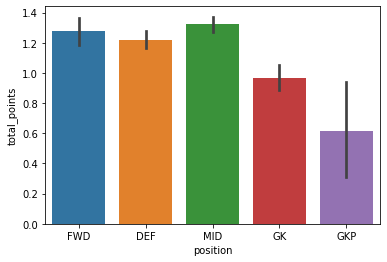

In [ ]:
sns.barplot(data=df2, x=df2["position"], y=df2["total_points"])

**Graph represent relation between position and goals scored**

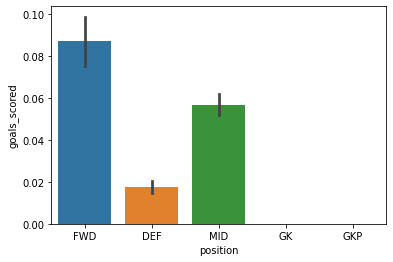

In [ ]:
sns.barplot(data=df2, x=df2["position"], y=df2["goals_scored"])

In [ ]:
df2 = pd.get_dummies(df2, columns = ['position'])

**return dataframe to its original form**

In [ ]:
df2=df2.sort_values(by=["GW"])

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23194 entries, 0 to 23193
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       23194 non-null  object 
 1   team                       23194 non-null  object 
 2   xP                         23194 non-null  float64
 3   assists                    23194 non-null  int64  
 4   bonus                      23194 non-null  int64  
 5   bps                        23194 non-null  int64  
 6   clean_sheets               23194 non-null  int64  
 7   creativity                 23194 non-null  float64
 8   element                    23194 non-null  float64
 9   fixture                    23194 non-null  float64
 10  goals_conceded             23194 non-null  int64  
 11  goals_scored               23194 non-null  int64  
 12  ict_index                  23194 non-null  float64
 13  influence                  23194 non-null  flo

# Model

**Extract** **features** **and** **target**

In [ ]:
feature = df2.drop('total_points',axis = 1)
target = df2['total_points']

In [ ]:
feature.drop(["name", "team","GW","round"], axis = 1, inplace = True)

**Spliting Data to train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0)